# Introduction to Machine Learning (CSCI-UA.473)

## Homework 5: Dimensionality Reduction and Clustering

### Due: December 5th, 2021 at 11:59PM

### Name: Jerry Jia

### Email: tj1043@nyu.edu

In this homework we will practice three concepts: 
1. Principal Component Analysis
2. Non-negative Matrix Factorization
3. K-means Clustering

## Dimensionality Reduction

### Load the necessary packages

In [84]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.decomposition import PCA, NMF

from tqdm import tqdm

### Getting data (nothing to do here)

**Please review the documentation for [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) and [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) to see what these functions do.  Here is more information on the [dataset](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html).**


Recall that for dimensionality reduction we form the matrix

$$
{\bf X} = [{\bf x}_1; {\bf x}_2; \ldots; {\bf x}_n] \in \mathbb{R}^{d\times n}
$$

where ${\bf x}_i \in \mathbb{R}^d$ is the space of the data and $n$ is the number of training points.  We want to find a **dictionary** matrix ${\bf W}$ and a **code** matrix ${\bf Z}$ such that ${\bf X} \approx {\bf WZ}$.  Dimensionality reduction comes in when we select ${\bf W} \in \mathbb{R}^{d \times p}$ and ${\bf Z} \in \mathbb{R}^{p\times n}$ with $p \ll d$.

In [2]:
# Load in the data.
newsgroups_train = datasets.fetch_20newsgroups(subset='train', 
                                               categories=['comp.sys.mac.hardware', 'rec.motorcycles', 'sci.med', 'soc.religion.christian'])

tfidf_vectorizer = TfidfVectorizer(min_df = 30)

# The data matrix X and the targets y.
X = (tfidf_vectorizer.fit_transform(newsgroups_train.data).T).todense()
y = newsgroups_train.target

(d, n) = X.shape
print("X has shape (d, n) = ", X.shape)



X has shape (d, n) =  (1771, 2369)


## Question P1: Principal Component Analysis (25 Points Total)

Recall that for dimensionality reduction we form the matrix

$$
{\bf X} = [{\bf x}_1; {\bf x}_2; \ldots; {\bf x}_n] \in \mathbb{R}^{d\times n}
$$

where ${\bf x}_i \in \mathbb{R}^d$ is the space of the data and $n$ is the number of training points.  We want to find a **dictionary** matrix ${\bf W}$ and a **code** matrix ${\bf Z}$ such that ${\bf X} \approx {\bf WZ}$.  Dimensionality reduction comes in when we select ${\bf W} \in \mathbb{R}^{d \times p}$ and ${\bf Z} \in \mathbb{R}^{p\times n}$ with $p \ll d$.

The dimensions of the data loaded above is reduced from `d=1771` to `p=5`.

In [5]:
# The reduced dimension.
p = 5

### Questions P1.a: Computing the dictionary and code matrices (5 Points)
Using the PCA implemented in Sci-Kit learn (`PCA()`), obtain the low-dimensional projection of ${\bf X}$ (i.e. get ${\bf W}$ and ${\bf Z}$) for when $p = 5$.  Read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) carefully.  In particular, make sure you are computing the correct ${\bf W}$ and ${\bf Z}$.

In [31]:
## Your code goes here
pca = PCA(n_components=p, random_state=42)

W = pca.fit_transform(X)
Z = pca.components_

print("W has shape ", W.shape)
print("Z has shape ", Z.shape)

W has shape  (1771, 5)
Z has shape  (5, 2369)


Run the cell below to check your results.  It prints out the first 5 principal components.

In [33]:
# Also print out the first p components.  There is nothing to do for this part.
loadings = W.T
invocab = dict([(vv,kk) for kk, vv in tfidf_vectorizer.vocabulary_.items()])

for i in range(5):
    insens_idx = np.argsort(loadings[i])

    print ('COMPONENT ' + str(i + 1))
    print (' '.join([invocab[w_ix] for w_ix in insens_idx[-10:]]) + '\n')

COMPONENT 1
for you it that in is and of to the

COMPONENT 2
n3jxp shameful cadre dsl edu cs gordon banks geb pitt

COMPONENT 3
is of gordon he banks geb that pitt we god

COMPONENT 4
was centris church quadra scsi apple drive mac of the

COMPONENT 5
thanks we monitor is se god university apple mac edu



### Question P1.b: Plotting the reduced data (5 Points)

The matrix ${\bf Z} = [{\bf z}_1; {\bf z}_2; \ldots ; {\bf z}_n] \in \mathbb{R}^{p \times n}$ is the matrix of the reduced data.  Make a scatter plot of the data projected onto its first two principal components.  In other words, form a scatter plot of all the ${\bf z}_i$ with the first component as the $x$-axis and the second component as the $y$-axis.  Set the color bar so that the points are colored corresponding to their target label ${\bf y}$ (which was defined earlier in the code).  Hint: look at the documentation [here](https://matplotlib.org/3.3.2/api/_as_gen/matplotlib.pyplot.scatter.html) for the `scatter()` function.

In [48]:
print(dict((_, list(y).count(_)) for _ in set(y)))

{0: 578, 1: 598, 2: 594, 3: 599}


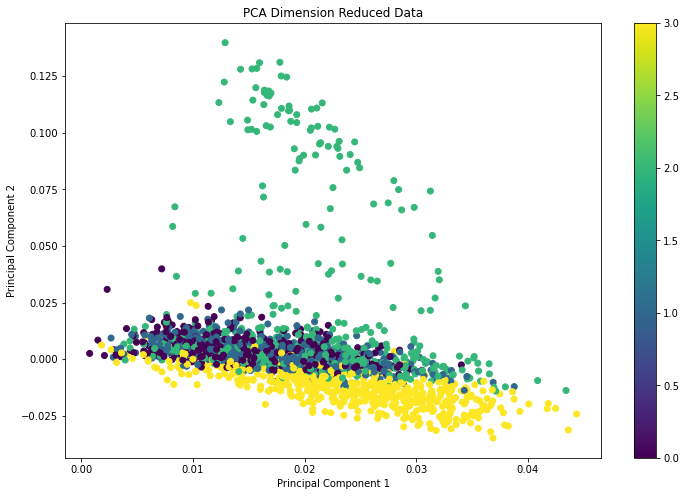

In [58]:
plt.figure(figsize=(12, 8))
## Your code starts here
plt.title('PCA Dimension Reduced Data')
plt.scatter(Z[0], Z[1], c=y)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

## Your code ends here
plt.colorbar();

### Question P1.c: Explain the variance (15 Points)

Recall that for PCA the dictionary and code matrices ${\bf W},{\bf Z}$ can be found using either an eigenvalue decomposition or the SVD.  Suppose the matrix ${\bf X}$ is centered so that 
$$
\frac{1}{n}\sum_{i = 1}^n {\bf x}_i = \vec{0} \in \mathbb{R}^d
$$
The covariance matrix is defined to be ${\bf C} = {\bf XX}^T$.  The eigen-decomposition of ${\bf C} = {\bf W\Sigma W}^T$ gives the matrices ${\bf W}$ and ${\bf Z} = {\bf \Sigma W}^T$.  Here

$$
{\bf \Sigma} = \begin{bmatrix}
\sigma_1^2 & & \\
 & \ddots & \\
 & & \sigma_d^2
\end{bmatrix}
$$

is the diagonal matrix with eigenvalues $\sigma_i^2$.  The proportion of explained variance by our low-dimensional projection is defined to be

$$
\mathrm{PV}(p) := \frac{\sum_{i=1}^p \sigma_i^2}{\sum_{i=1}^d \sigma_i^2}
$$

Make a plot of $\mathrm{PV}(p)$ versus $p$ for $p = 1,\ldots,1000$.  You do not need to implement the procedure above on your own, but can instead use the Sci-kit learn PCA.  In particular, look at the `explained_variance_ratio_` attribute.  Make sure that your plot has an appropriate title and labels for the axes.

In [67]:
## Your code goes here
p_max = 1000
var = []
for p in tqdm(range(1, p_max)):
    pca = PCA(n_components=p, random_state=42)
    pca.fit(X)
    var.append(sum(pca.explained_variance_ratio_))


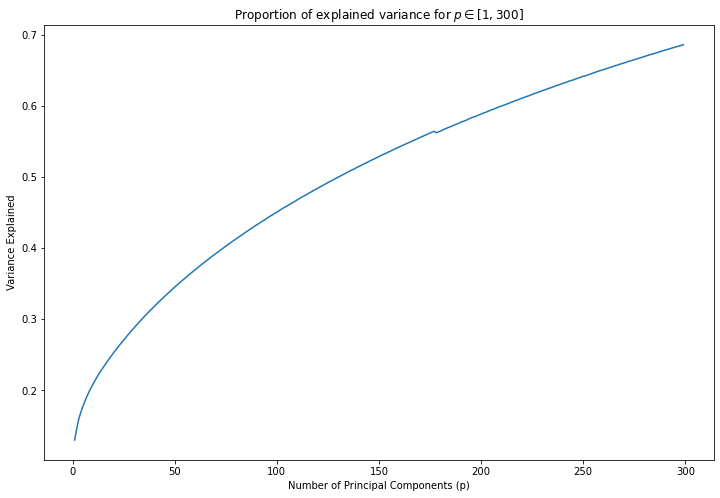

In [68]:
plt.figure(figsize=(12, 8))
plt.title(f'Proportion of explained variance for $p \in[1,{p_max}]$')
plt.plot(range(1, p_max), var)
plt.xlabel('Number of Principal Components (p)')
plt.ylabel('Variance Explained')
plt.show()

## Question P2. Non-Negative Matrix Factorization (NMF) (30 Points Total)

### Question P2.a: Computing the dictionary and code matrices (10 Points)

Similarly to PCA in Part 1, use the NMF implemented in Sci-Kit learn to obtain the low-dimensional projection of ${\bf X}$ (i.e. get ${\bf W}$ and ${\bf Z}$) for when $p = 5$.  Read the documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html) carefully.  In particular, make sure you are computing the correct ${\bf W}$ and ${\bf Z}$.

In [77]:
## Your code goes here
p = 5
nmf = NMF(n_components=p, random_state=42, init='nndsvda')

W = nmf.fit_transform(X)
Z = nmf.components_

print("W has shape ", W.shape)
print("Z has shape ", Z.shape)
# print((W @ Z).shape)

W has shape  (1771, 5)
Z has shape  (5, 2369)


### Question P2.b: Compute the reconstruction error (20 Points)

Define the reconstruction error

$$
R(p) := \frac{1}{2}\|{\bf X} - {\bf WZ}\|_F^2
$$

where

$$
\|M\|_F^2 = \sum_{i = 1}^m \sum_{j = 1}^k M_{ij}^2
$$

is the Frobenius norm of $M \in \mathbb{R}^{m \times k}$.  Make a plot of the reconstuction error $R(p)$ versus $p$, for $p = 5, 10, 15, \ldots, 50$.  Make sure the plot is clear with labeled axes and an appropriate title.  You can just use the `reconstruction_err_` attribute provided in Sci-kit learn.

In [87]:
## Your code goes here
p_n = 10
p_step = 5

reconstruction_err_nmf = []

for p in tqdm(range(p_step, p_step + p_n * p_step, p_step)):
    R = NMF(n_components=p, random_state=42, init='nndsvda',
            max_iter=400).fit(X).reconstruction_err_
    reconstruction_err_nmf.append(R)

 10%|█         | 1/10 [00:06<00:57,  6.43s/it]/home/jkker/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 400 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
 20%|██        | 2/10 [00:18<01:19,  9.92s/it]/home/jkker/miniconda3/envs/ml/lib/python3.9/site-packages/sklearn/decomposition/_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 400 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
100%|██████████| 10/10 [02:12<00:00, 13.25s/it]


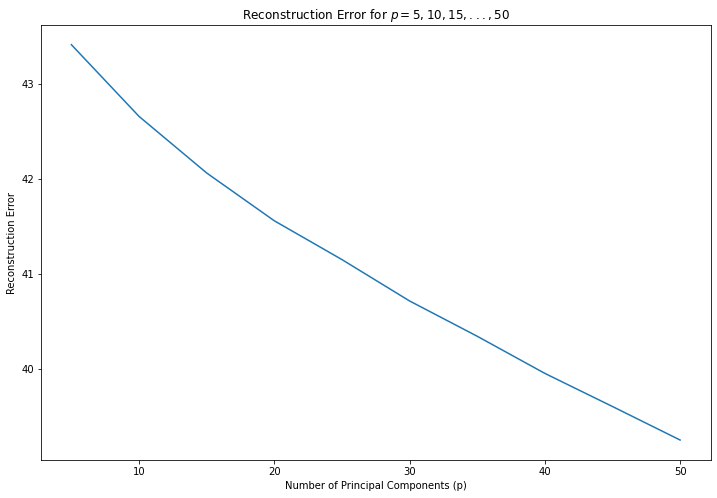

In [88]:
plt.figure(figsize=(12, 8))
plt.title(f'Reconstruction Error for $p = 5,10,15,...,50$')
plt.plot(range(p_step, p_step + p_n * p_step, p_step), reconstruction_err_nmf)
plt.xlabel('Number of Principal Components (p)')
plt.ylabel('Reconstruction Error')
plt.show()

## Question P3. K-Means Clustering (45 Points Total)

We will now learn about k-means algorithm and use it for the problem of image segmentation. In particular, you will use the K-means clustering algorithm to segment an image into $K$ distinct colors.  The file name for the particular image you will work with is `wsq_park.jpg` (provided to you as part of the assignment). 


We first need to install a couple of necessary packages used for the purpose of computer vision. 

Below are all of the packages you will need for this assignment.  `cv2` refers to the package OpenCV, which you may need to install.  This can be done with the command

`pip install opencv-python`

OpenCV is a package for computer vision, but here we will only use it to help display images.  You may also need the `pickle` package which can be installed with

`pip install pickle`

**Do not** alter the cell below or add any other packages.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import multivariate_normal as normal # Multivariate normal distribution
from scipy.stats import multinomial # Multinomial distribution
import cv2 # OpenCV package for computer vision

### Load the image data (nothing to do here)

In [ ]:
# Load the image and convert it from BGR (used by cv2) to RGB (used by matplotlib).
wsq_image = cv2.cvtColor(cv2.imread("wsq_park.jpg"), cv2.COLOR_BGR2RGB)
plt.figure(figsize = (15,10))
# Show the image.
plt.imshow(wsq_image);

Since each pixel has a red, blue, and green value we can think of each pixel as a vector ${\bf x}_i \in \mathbb{R}^3$ for $i=1,\ldots,N$, where $N$ is the number of pixels in the image.  Let ${\bf X} = [{\bf x}_1,\ldots, {\bf x}_N]^T \in \mathbb{R}^{N \times 3}$ be the dataset which is the collection of all of the pixels.  You will use K-means to cluster the points in the dataset together, which will effectively segment into regions of similar colors.  The code below processes the image for you to fit this format.  You do not need to do anything here.

In [ ]:
# The dataset X of all the pixel RGB values.
X = wsq_image.reshape((wsq_image.shape[0] * wsq_image.shape[1], wsq_image.shape[2]))

### Question P3.a: Implementing K-means (25 Points)

Start by implementing the `KMeans` class.  You need to fill in the following methods.

1. `fit`, the main K-means clustering algorithm to determine the cluster centers $\mu_j \in \mathbb{R}^3$ for $j = 1,\ldots,K$.
2. `compute_distances`, a method to compute the squared distances $\|{\bf x}_i - \mu_j\|^2$ for all $i=1,\ldots,N$ and $j = 1,\ldots,K$.
3. `distortion`, a method that computes the distortion $J$ defined by
$$
J = \sum_{i=1}^N \sum_{j=1}^K r_{ij} \|{\bf x}_i - \mu_j\|^2
$$
where
$$
r_{ij} = \begin{cases}
1 & \text{ if } \|{\bf x}_i - \mu_j\|^2 = \mathrm{min}_{l \in \{1,\ldots, K\}} \|{\bf x}_i - \mu_l\|^2\\
0 & \text{ otherwise }
\end{cases}
$$
In other words, $r_{ij}$ is 1 if data point ${\bf x}_i$ is assigned to cluster $j \in \{1,\ldots,K\}$ and 0 otherwise.

See the methods below for further description.  You may use the Numpy function `numpy.linalg.norm` to compute the norms of vectors.

In [ ]:
class KMeans:
    
    """
    Initialize the K-means model.  Here labels denotes the numpy array of shape (N, ) where each entry at index
    i is an integer in {1,...,K} according to which cluster point x_i is assigned to.
    
    Input:
    K, int -- the number of clusters
    X, numpy.ndarray -- shape (N, d) where N is the number of data points and d is the dimension
    mu_0, numpy.ndarray -- shape (K, d) where K is number of clusters and d is the dimension, 
                           initialization of cluster centers
    """
    def __init__(self, K, X, mu_0):
        assert K == mu_0.shape[0]
        self.K = K
        self.X = X
        self.N = X.shape[0]
        self.mu = mu_0
        self.labels = None
    
    """
    The K-Means clustering algorithm.  Update the array of the means, m, as well as the array of labels
    for each point in the dataset.
    
    Input:
    iters, int -- the number of K-means iterations to perform
    
    Return:
    labels, numpy.ndarray -- numpy array of ints of shape (N, )
                             the cluster assignments (i.e. self.labels after it has been updated)
    """
    def fit(self, iters):
        labels = np.zeros(self.N)
        mu = self.mu
        ## TO DO STARTS HERE ##

        ## TO DO ENDS HERE ##
        
        # Ensure that the cluster assignments are integers.
        labels = labels.astype(int)
        self.labels = labels
        self.mu = mu
        return labels
    
    """
    Compute the squared distances from each point in the dataset to each cluster center in the array m.
    
    Return:
    dist, numpy.ndarray -- shape (N, K) of |x_i - mu_j|^2 for i=1,...,N and j=1,...,K
    """
    def compute_distances(self):
        ## TO DO STARTS HERE ##
        dist = ?
        ## TO DO ENDS HERE ##
        return dist
    
    """
    Compute the distortion J for the current clustering assignment.  Assume that the cluster assignments have
    already been computed after fit is called with at least 1 iteration.
    
    Return:
    J, float -- the distortion
    """
    def distortion(self):
        assert self.labels is not None   
        J = 0.
        ## TO DO STARTS HERE ##
        
        ## TO DO ENDS HERE ##
        return J

### Question P3.b: Distortion and the Elbow Method (10 Points)

In this part you will determine the number of clusters to use for image segmentation by plotting the distortion $J$ for different $K$.  You must do the following.

1.  Use 15 iterations of K-means and compute the distortion for $K = 1,2,\ldots,9$.
2.  Approximately how many clusters should be used?  In other words, what value of $K$ corresponds to the "elbow" in the curve?

In [ ]:
# Load the initial means for K-means.
initial_means = pickle.load(open("kmeans_initial_means.p", "rb"))

K = np.arange(1, 9 + 1, 1) # The array of K values, k = 1,2,...,9.
J = np.zeros(len(K)) # The array of the distortion values for the different k.

# Loop over all k = 1,2,...,9
for k in range(1, len(K) + 1):
    
    # Initialization of the cluster centers.
    mu_0 = initial_means[k - 1]
    
    # Compute the distortion.
    ## TO DO STARTS HERE ##

    ## TO DO ENDS HERE ##
    print('K = {:d} finished.'.format(k))

    
# Plot the results.
plt.plot(K, J, 'b-s', lw = 2)
plt.xlabel(r'Clusters $k$')
plt.ylabel(r'Distortion')
plt.title(r'Elbow Method for $K$-means')
plt.grid()
plt.show()

### Question P3.c: Image Segmentation (10 Points)

Now use the $K$ you found in the previous part from the elbow method to cluster the dataset ${\bf X}$.  You will plot the segmented image, which now only uses $K$ distinct colors.  To do this you will need to do the following.

1.  Run K-means for 15 iterations using the $K$ you found in the previous part.  You may use any initialization you wish as long as your results converge.  Although you may want to use the provided initialization.

2.  Using the cluster assignments for each point create a new matrix ${\bf Y} \in \mathbb{R}^{N \times 3}$ where each row ${\bf y}_i \in \mathbb{R}^3$ is $\mu_j$, where $\mu_j$ is the center of the cluster $j$ that ${\bf x}_i$ is assigned to.  For example, if ${\bf x}_1$ is assigned to cluster 2, then the first row of ${\bf Y}$ is ${\bf y}_1 = \mu_2$.

3.  Since RGB values are integers between 0 and 255 (inclusive) you will need to do one of two things.  You can either round all of the results in ${\bf Y}$ to integers between 0 and 255, or you can normalize so that all values are floats between 0 and 1.  The `imshow` function will work with either of these.

Note that choosing a larger $K$ will result in an image closer to the original, so if the $K$ you found in the previous part is small then the segmented image will only use a few different colors.

In [ ]:
## TO DO STARTS HERE ##
Y = ?
## TO DO ENDS HERE ##
segmented_image = Y.reshape(wsq_image.shape)

plt.figure(figsize = (15, 10))
plt.imshow(segmented_image)
plt.show();